# Web scraping tutorial 

Salaries of college presidents

*This notebook is mainly inspired by Will Koehrsen's tutorial ["Web Scraping, Regular Expressions, and Data Visualization: Doing it all in Python"](https://towardsdatascience.com/web-scraping-regular-expressions-and-data-visualization-doing-it-all-in-python-37a1aade7924).*

In this tutorial, you will learn how to:

1. Get a web page with [Requests](https://docs.python-requests.org/en/latest/) 


1. Pulling data out of HTML using  [Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)


1. Perform data tidying using [pandas](https://pandas.pydata.org/)


1. Visualize data data with [seaborn](https://seaborn.pydata.org/) and [Matplotlib](https://matplotlib.org/)

## Prerequisites

To start this tutorial, you need: 

- Some basic understanding of HTML and CSS as well as the Chrome extension SelectorGadget. Follow the instructions in this [web scraping tutorial](https://kirenz.github.io/codelabs/codelabs/webscraping/#0) to learn more.

## Setup

In [134]:
%matplotlib inline
from IPython.display import IFrame

import requests 
from bs4 import BeautifulSoup

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

## Scrape with Requests

- First, take a look at the [website](https://www.cleveland.com/metro/index.ssf/2017/12/case_western_reserve_university_president_barbara_snyders_base_salary_and_bonus_pay_tops_among_private_colleges_in_ohio.html) 


In [4]:
# Display website in notebook
IFrame('https://www.cleveland.com/metro/index.ssf/2017/12/case_western_reserve_university_president_barbara_snyders_base_salary_and_bonus_pay_tops_among_private_colleges_in_ohio.html', width=800, height=450)

- We use the `requests` library for retrieving the HTML content from this webpage:

In [6]:
# Make the GET request to a url
url = 'http://www.cleveland.com/metro/index.ssf/2017/12/case_western_reserve_university_president_barbara_snyders_base_salary_and_bonus_pay_tops_among_private_colleges_in_ohio.html'

html = requests.get(url)

- Check if the response was succesfull

In [7]:
html

<Response [200]>

- Response 200 means that the request has succeeded. 

## Investigate HTML with Beautiful Soup


- There are 2 pieces of information we need want extract from the text:

  - names of the presidents
  - salaries 

In [86]:
soup = BeautifulSoup(html.text, 'html.parser')

- The relevant data (names and salary) is inside `soup` somewhere.

- Next, we need to locate it using [CSS selectors](https://www.w3schools.com/cssref/css_selectors.asp). 

- One way to do this is by going to the [website](https://www.cleveland.com/metro/index.ssf/2017/12/case_western_reserve_university_president_barbara_snyders_base_salary_and_bonus_pay_tops_among_private_colleges_in_ohio.html) and inspecting the element (e.g. using DevTools in Google Chrome). 

- We find that the relevant information is stored as unorder list (`ul`)

- Investigate the element `ul`

In [89]:
print(soup.ul.prettify())

<ul class="article__unordered-list">
 <li>
  <span>
   Grant Cornwell, College of Wooster (left in 2015): $911,651
  </span>
 </li>
 <li>
  <span>
   Marvin Krislov, Oberlin College (left in 2016):  $829,913
  </span>
 </li>
 <li>
  <span>
   Mark Roosevelt, Antioch College, (left in 2015): $507,672
  </span>
 </li>
 <li>
  <span>
   Laurie Joyner, Wittenberg University (left in 2015): $463,504
  </span>
 </li>
 <li>
  <span>
   Richard Giese, University of Mount Union (left in 2015): $453,800
  </span>
 </li>
 <li>
  <span>
   Sean Decatur,Kenyon College: $451,698
  </span>
 </li>
 <li>
  <span>
   Adam Weinberg, Denison University: $435,322
  </span>
 </li>
 <li>
  <span>
   Daniel Dibiasio, Ohio Northern University: $414,716
  </span>
 </li>
 <li>
  <span>
   Denvy Bowman, Capital University (left in 2016): $388,570
  </span>
 </li>
 <li>
  <span>
   Anne Steele, Muskingum University (left in 2016): $384,233
  </span>
 </li>
 <li>
  <span>
   Kathy Krendl, Otterbein University:  $37

- We save the content as `u_list`

In [83]:
u_list = soup.ul

- Note that we also could extract only the text of element `ul` (using `soup.ul.text`)

- However, this would make it more difficult to extract specific information from the object, since the structure is lost (use `print(soup.ul.text)`to observe the result

- Next, we iterate over the element `span` from `u_list` 

In [92]:
for i in u_list.find_all('span'):
    print(i.text)

Grant Cornwell, College of Wooster (left in 2015): $911,651
Marvin Krislov, Oberlin College (left in 2016):  $829,913
Mark Roosevelt, Antioch College, (left in 2015): $507,672
Laurie Joyner, Wittenberg University (left in 2015): $463,504
Richard Giese, University of Mount Union (left in 2015): $453,800
Sean Decatur,Kenyon College: $451,698
Adam Weinberg, Denison University: $435,322
Daniel Dibiasio, Ohio Northern University: $414,716
Denvy Bowman, Capital University (left in 2016): $388,570
Anne Steele, Muskingum University (left in 2016): $384,233
Kathy Krendl, Otterbein University:  $378,035
Rockwell Jones, Ohio Wesleyan University: $366,625
Robert Helmer, Baldwin Wallace University: $365,616
Robert Huntington, Heidelberg University: $300,005
Lori Varlotta, Hiram College: $293,336
Joseph Bruno, Marietta College (left in 2016): $288,295
W. Richard Merriman Jr., University of Mount Union (started in June 2015): $221,761


- Store the data in an array (called `raw_text`):

In [93]:
raw_text = []

for i in u_list.find_all('span'):
    raw_text.append(i.text)

## Data tidying

*We use some of the methods described in the pandas documentation about ["working with text data"](https://pandas.pydata.org/docs/user_guide/text.html#working-with-text-data)*

- We want to use pandas to perform our data tidying so let's create a dataframe:

In [119]:
df = pd.DataFrame( {"text": raw_text} )

df

,text
0,"Grant Cornwell, College of Wooster (left in 20..."
1,"Marvin Krislov, Oberlin College (left in 2016)..."
2,"Mark Roosevelt, Antioch College, (left in 2015..."
3,"Laurie Joyner, Wittenberg University (left in ..."
4,"Richard Giese, University of Mount Union (left..."
5,"Sean Decatur,Kenyon College: $451,698"
6,"Adam Weinberg, Denison University: $435,322"
7,"Daniel Dibiasio, Ohio Northern University: $41..."
8,"Denvy Bowman, Capital University (left in 2016..."
9,"Anne Steele, Muskingum University (left in 201..."


- A typical entry in our column text looks like:

"Grant Cornwell, College of Wooster (left in 2015): $911,651"

- In general, the structur is as follows:

"name, college (left in year): $salary"

- Note that the name is the first element and is followed by and semicolon (",")
- The salary is the last entry in our data (followed by the symbol "$")

### Extract names

- Extract the names of the presidents 

- Make a split at every "," and extract the first element with index 0

In [120]:
df['name'] = df['text'].str.split(",").str.get(0)

In [121]:
df.head()

,text,name
0,"Grant Cornwell, College of Wooster (left in 20...",Grant Cornwell
1,"Marvin Krislov, Oberlin College (left in 2016)...",Marvin Krislov
2,"Mark Roosevelt, Antioch College, (left in 2015...",Mark Roosevelt
3,"Laurie Joyner, Wittenberg University (left in ...",Laurie Joyner
4,"Richard Giese, University of Mount Union (left...",Richard Giese


### Extract salary

- Extract the salary:

In [122]:
df['salary'] = df['text'].str.split("$").str.get(1)

In [123]:
df.head()

,text,name,salary
0,"Grant Cornwell, College of Wooster (left in 20...",Grant Cornwell,"911,651"
1,"Marvin Krislov, Oberlin College (left in 2016)...",Marvin Krislov,"829,913"
2,"Mark Roosevelt, Antioch College, (left in 2015...",Mark Roosevelt,"507,672"
3,"Laurie Joyner, Wittenberg University (left in ...",Laurie Joyner,"463,504"
4,"Richard Giese, University of Mount Union (left...",Richard Giese,"453,800"


- Fix data format in salary (drop the ","):

In [124]:
df['salary'] = df['salary'].str.replace(",", "")

- Make the data numeric

In [125]:
df['salary'] = df['salary'].astype("int32")

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    17 non-null     object
 1   name    17 non-null     object
 2   salary  17 non-null     int32 
dtypes: int32(1), object(2)
memory usage: 468.0+ bytes


## Data visualization


- We will use the matplotlib and seaborn libraries for visualizing the results. 

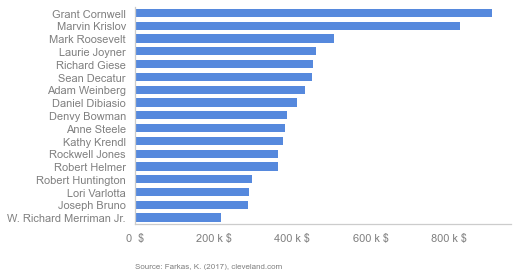

In [161]:
sns.set_style("whitegrid", {'axes.grid' : False})


fig, ax = plt.subplots()


sns.barplot(x="salary", 
            y="name", 
            color="#3F83F4",
            #edgecolor = 'k', 
            linewidth = 2,
            data=df);

ax.xaxis.set_major_formatter('{x:1.0f} k $')
ax.xaxis.set_major_formatter(ticker.EngFormatter(' $'))
ax.xaxis.set_tick_params(which='major', labelcolor='grey')  

ax.yaxis.set_tick_params(which='major', labelcolor='grey', labelleft=True)

sns.despine()

plt.ylabel("")
plt.xlabel("")

# Text for caption
txt = 'Source: Farkas, K. (2017), cleveland.com'

# Add the caption
plt.text(x = -5, 
         y = 20, 
         s = txt, 
         color = "grey",
         size = 8);